In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (6,5)

In [2]:
mob = pd.read_csv("train_mob.csv")
print(mob.head())

       Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0  T0005689460           6.77           B                    1.0   
1  T0005689461          29.47           B                   10.0   
2  T0005689464          41.58         NaN                   10.0   
3  T0005689465          61.56           C                   10.0   
4  T0005689467          54.95           C                   10.0   

   Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0           2.42769                           A                A   
1           2.78245                           B                A   
2               NaN                         NaN                E   
3               NaN                         NaN                A   
4           3.03453                           B                A   

   Customer_Rating  Cancellation_Last_1Month  Var1  Var2  Var3  Gender  \
0          3.90500                         0  40.0    46    60  Female   
1          3.45000                

In [3]:
print(mob.columns)

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


In [4]:
print(mob.shape)

(131662, 14)


In [5]:
print("Data types of every feature: \n\n", mob.dtypes)

Data types of every feature: 

 Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object


In [6]:
X = mob.drop(["Trip_ID", "Surge_Pricing_Type"], axis = 1)
y = mob['Surge_Pricing_Type']

In [7]:
print(X.columns)
print(y)

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')
0         2
1         2
2         2
3         3
4         2
         ..
131657    3
131658    2
131659    2
131660    2
131661    1
Name: Surge_Pricing_Type, Length: 131662, dtype: int64


##### Null Values

In [8]:
print(X.isna().sum()) #I will impute the values after checking the distribution

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
dtype: int64


##### Categorical and Numerical Columns

In [9]:
cat_cols = X.select_dtypes(include = 'object')
num_cols = X.select_dtypes(exclude = 'object')

In [10]:
print("Categorical:\n\n", cat_cols.head(), "\n\n")
print("Numerical:\n\n", num_cols.head())

Categorical:

   Type_of_Cab Confidence_Life_Style_Index Destination_Type  Gender
0           B                           A                A  Female
1           B                           B                A    Male
2         NaN                         NaN                E    Male
3           C                         NaN                A    Male
4           C                           B                A    Male 


Numerical:

    Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0           6.77                    1.0           2.42769          3.90500   
1          29.47                   10.0           2.78245          3.45000   
2          41.58                   10.0               NaN          3.50125   
3          61.56                   10.0               NaN          3.45375   
4          54.95                   10.0           3.03453          3.40250   

   Cancellation_Last_1Month  Var1  Var2  Var3  
0                         0  40.0    46    60  
1 

### Data Exploration

In [11]:
def plotting(df, fname, var_type): #var type is cat or num
    plt.figure(figsize = (6,5))
    if var_type == 'num':
        sns.kdeplot(df[fname], shade = True)
        plt.xlabel(fname)
        plt.title("Density Plot for {}".format(fname))
        plt.show()
        
    elif var_type == 'cat':
        sns.countplot(x = df[fname])
        plt.title("Barplot for {}".format(fname))
        plt.show()

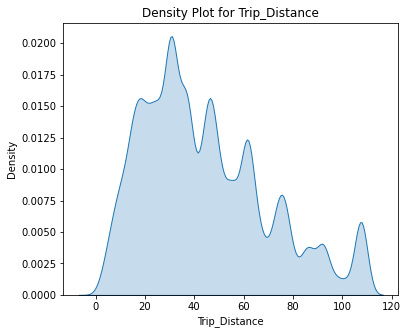

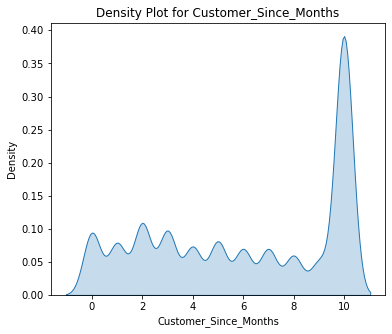

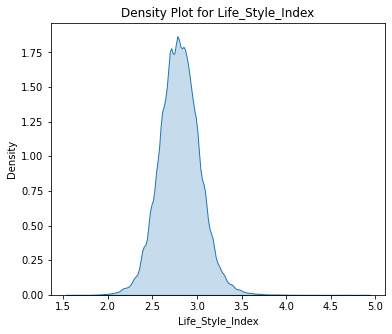

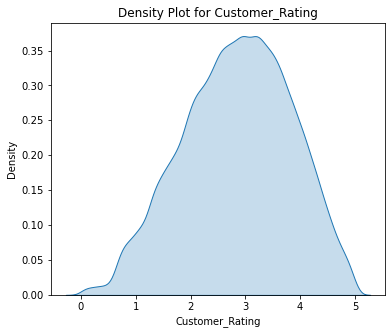

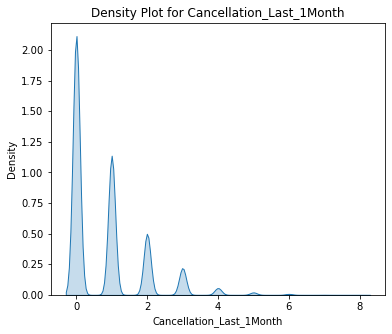

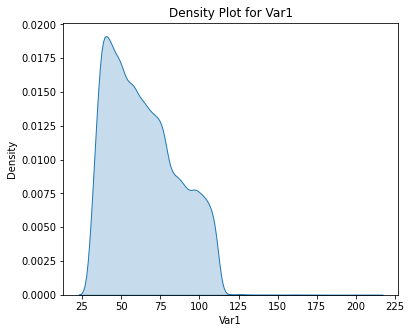

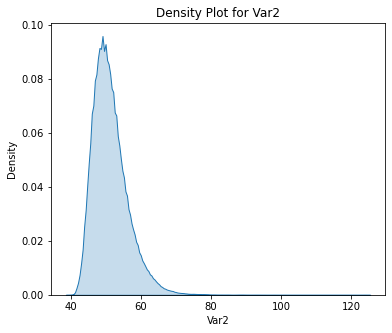

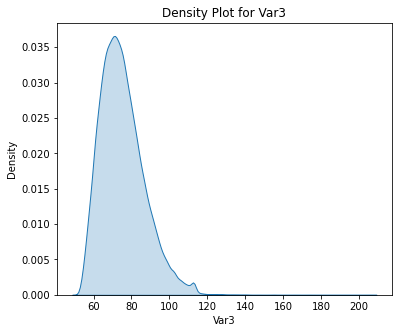

In [12]:
for i in num_cols.columns:
    plotting(num_cols, i, 'num')

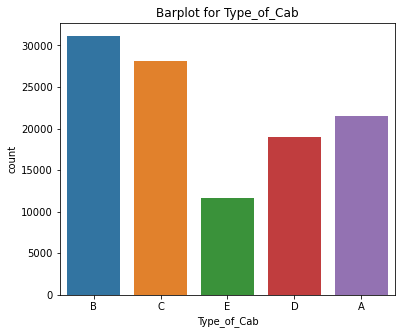

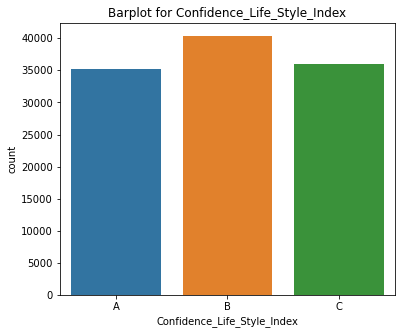

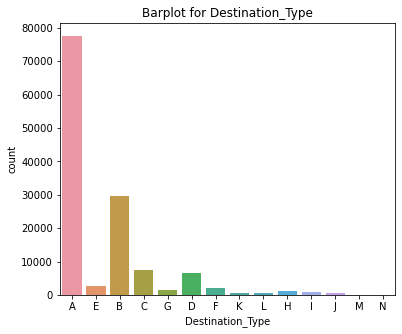

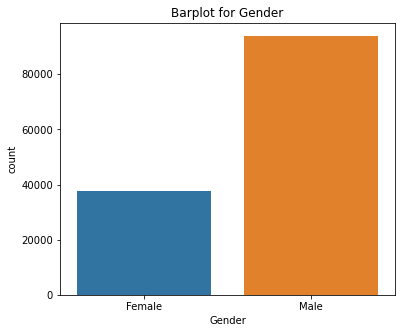

In [13]:
for i in cat_cols.columns:
    plotting(cat_cols, i, 'cat')

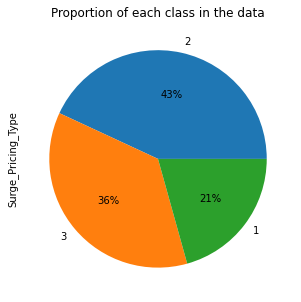

In [14]:
y.value_counts().plot(kind = 'pie', autopct = "%1.0f%%")
plt.title("Proportion of each class in the data")
plt.show()

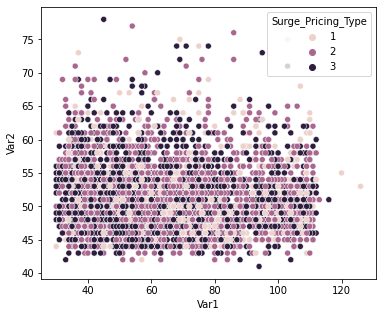

In [15]:
sns.scatterplot(data = X.iloc[:10000, :], x = "Var1", y = "Var2", hue = y)
plt.show()

### Correlation

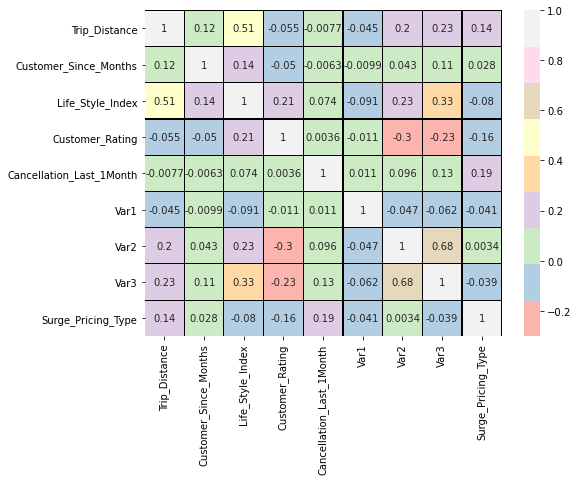

In [16]:
plt.figure(figsize = (8,6))
corr = mob.iloc[:,1:].corr()
sns.heatmap(corr, linewidth = 0.1, linecolor = "black", cmap = sns.color_palette("Pastel1"),
           annot = True)
plt.autoscale(enable=True, axis='y')
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

##### Some more visualizations...

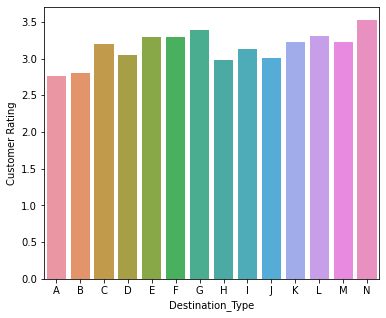

In [17]:
# Average Customer Rating for each Destination Type
xx = X.groupby('Destination_Type')['Customer_Rating'].mean().index
yy = X.groupby('Destination_Type')['Customer_Rating'].mean().values
plt.ylabel("Customer Rating")
sns.barplot(xx, yy)
plt.show()

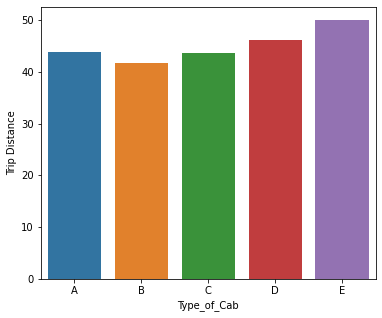

In [18]:
# Average Trip Distance according to Cab Type
xx = X.groupby('Type_of_Cab')['Trip_Distance'].mean().index
yy = X.groupby('Type_of_Cab')['Trip_Distance'].mean().values
plt.ylabel("Trip Distance")
sns.barplot(xx, yy)
plt.show()

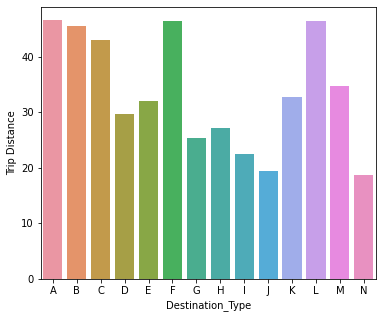

In [19]:
# Average Trip Distance for each Destination Type
xx = X.groupby('Destination_Type')['Trip_Distance'].mean().index
yy = X.groupby('Destination_Type')['Trip_Distance'].mean().values
plt.ylabel("Trip Distance")
sns.barplot(xx, yy)
plt.show()

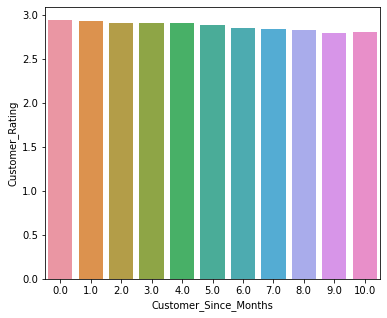

In [20]:
# Average Customer Rating for number of months since the customer is using the app
xx = X.groupby('Customer_Since_Months')['Customer_Rating'].mean().index
yy = X.groupby('Customer_Since_Months')['Customer_Rating'].mean().values
plt.ylabel("Customer_Rating")
sns.barplot(xx, yy)
plt.show()

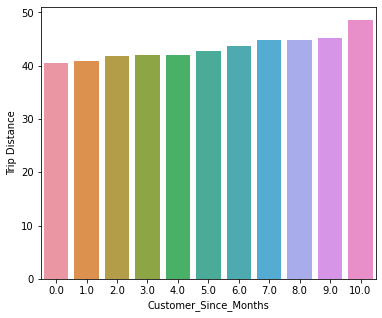

In [21]:
# Average Trip Distance for number of months since the customer is using the app
xx = X.groupby('Customer_Since_Months')['Trip_Distance'].mean().index
yy = X.groupby('Customer_Since_Months')['Trip_Distance'].mean().values
plt.ylabel("Trip Distance")
sns.barplot(xx, yy)
plt.show()

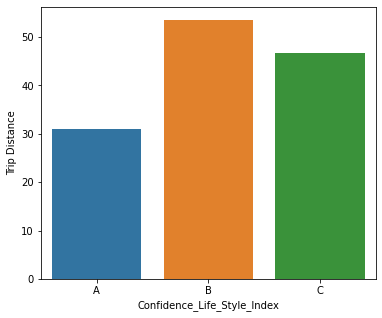

In [22]:
# Average Trip Distance for each Life_Style_Index
xx = X.groupby('Confidence_Life_Style_Index')['Trip_Distance'].mean().index
yy = X.groupby('Confidence_Life_Style_Index')['Trip_Distance'].mean().values
plt.ylabel("Trip Distance")
sns.barplot(xx, yy)
plt.show()

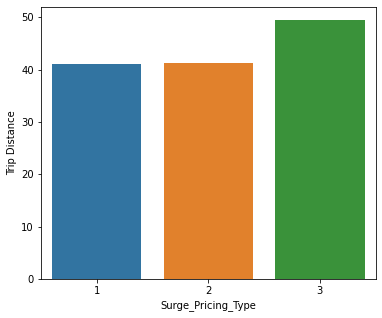

In [23]:
# Average Trip Distance for Surge Price Type
xx = X.groupby(y)['Trip_Distance'].mean().index
yy = X.groupby(y)['Trip_Distance'].mean().values
plt.ylabel("Trip Distance")
sns.barplot(xx, yy)
plt.show()

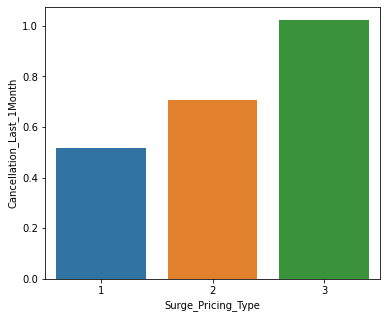

In [24]:
# Average Number of Cancellations in Last 1 Month for Surge Price Type
xx = X.groupby(y)['Cancellation_Last_1Month'].mean().index
yy = X.groupby(y)['Cancellation_Last_1Month'].mean().values
plt.ylabel("Cancellation_Last_1Month")
sns.barplot(xx, yy)
plt.show()

### Some important functions

In [25]:
# Imputation

def impute(data):
    
    import statistics
    data['Type_of_Cab'] = data['Type_of_Cab'].fillna(statistics.mode(data['Type_of_Cab']))
    data['Customer_Since_Months'] = data['Customer_Since_Months'].fillna(statistics.median(data['Customer_Since_Months']))
    data['Life_Style_Index'] = data['Life_Style_Index'].fillna(statistics.mode(data['Life_Style_Index']))
    data['Confidence_Life_Style_Index'] = data['Confidence_Life_Style_Index'].fillna(statistics.mode(data['Confidence_Life_Style_Index']))
    data['Var1'] = data['Var1'].fillna(np.mean(data['Var1']))

In [26]:
# Normalize/Standardize

def normalize_standardize(data, operation): #If operation = 'normalize', then normalizes data (train)
                                            #If operation = 'standardize', then standardizes data
                                            #Returns none
    from sklearn.preprocessing import StandardScaler, Normalizer
    if operation == 'standardize':
        data = StandardScaler().fit_transform(data)
    
    if operation == 'normalize':
        data = Normalizer().fit_transform(data)
        
    if operation == None:
        data = StandardScaler().fit_transform(data)
        
    return(data)  

In [27]:
def encoding(data, method): #Encodes the data as per selected 'method' parameter
                            #method : 'mean', 'label', 'onehot'
                        
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    le = LabelEncoder()
    #ohe = OneHotEncoder(drop = 'first')

    cat_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender']
    
    if method == 'mean':
        for i in cat_cols:
            mean_encoded_subject = data.groupby(i)['is_promoted'].mean().to_dict() 
            data[i] =  data[i].map(mean_encoded_subject)
          

    if method == 'label':
        for i in cat_cols:
            data.loc[:, i] = le.fit_transform(data[i])
            data.loc[:, i] = data[i].astype('category')        
    
    if method == 'onehot':
        for i in cat_cols:
            data.loc[:, i] = le.fit_transform(data[i])
            data.loc[:, i] = data[i].astype('category')
        data = pd.get_dummies(data, drop_first = True, columns = cat_cols)
        
    return(data)
     

### Upsampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority')
Xover, yover = ros.fit_resample(X, y)
print(Xover.shape, yover.shape)

(170184, 12) (170184,)


In [29]:
yover.value_counts()

3    56728
2    56728
1    56728
Name: Surge_Pricing_Type, dtype: int64

### Train and Valid sets

In [30]:
xtrain, xvalid, ytrain, yvalid = train_test_split(Xover, yover, test_size = 0.3)

print("Train:\n", xtrain.shape, ytrain.shape)
print("Validation:\n", xvalid.shape, yvalid.shape)

print("Class balance: \n\n")
print("Train\n", ytrain.value_counts())
print("Valid\n", yvalid.value_counts())

Train:
 (119128, 12) (119128,)
Validation:
 (51056, 12) (51056,)
Class balance: 


Train
 3    39733
1    39732
2    39663
Name: Surge_Pricing_Type, dtype: int64
Valid
 2    17065
1    16996
3    16995
Name: Surge_Pricing_Type, dtype: int64


### Preprocessing

In [31]:
# Imputation

impute(xtrain)
impute(xvalid)

print("Train:\n", xtrain.isna().sum(), "\n\n\n")
print("Valid:\n",xvalid.isna().sum())

Train:
 Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64 



Valid:
 Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64


In [32]:
# Standardize

xtrain.loc[:, num_cols.columns] = normalize_standardize(xtrain.loc[:, num_cols.columns], operation = 'standardize')
xvalid.loc[:, num_cols.columns] = normalize_standardize(xvalid.loc[:, num_cols.columns], operation = 'standardize')

print("Train:\n", xtrain.head(), "\n\n\n")
print("Valid:\n", xvalid.head())

Train:
         Trip_Distance Type_of_Cab  Customer_Since_Months  Life_Style_Index  \
23175        1.560290           E               0.774539          0.962995   
162671       0.456078           A               0.774539          0.231273   
144957      -0.553578           A               1.049282         -0.454577   
83983        0.044224           C              -0.873917         -0.502244   
119097      -0.220455           A              -1.148660         -0.484954   

       Confidence_Life_Style_Index Destination_Type  Customer_Rating  \
23175                            B                A        -0.173677   
162671                           C                A        -0.825698   
144957                           C                A         1.091862   
83983                            B                A         0.410319   
119097                           C                I        -0.407275   

        Cancellation_Last_1Month          Var1      Var2      Var3  Gender  
23175        

In [33]:
# Encoding for train data (Label and One-Hot)

xtrain_lenc = xtrain.copy()
xtrain_henc = xtrain.copy()
xtrain_lenc = encoding(xtrain_lenc, method = 'label')
xtrain_henc = encoding(xtrain_henc, method = 'onehot')

print("Label:", xtrain_lenc.shape)
print("One Hot:", xtrain_henc.shape)

Label: (119128, 12)
One Hot: (119128, 28)


In [34]:
# Encoding for valid data (Label and One-Hot)

xvalid_lenc = xvalid.copy()
xvalid_henc = xvalid.copy()
xvalid_lenc = encoding(xvalid_lenc, method = 'label')
xvalid_henc = encoding(xvalid_henc, method = 'onehot')


print("Label:", xvalid_lenc.shape)
print("One Hot:", xvalid_henc.shape)

Label: (51056, 12)
One Hot: (51056, 28)


### Random Forest 

##### Label Encoded Features

In [35]:
# Fitting
rfc1 = RandomForestClassifier(random_state = 3)
rfc1.fit(xtrain_lenc, ytrain)

# Evaluation
print("Accuracy:", accuracy_score(yvalid, rfc1.predict(xvalid_lenc)))
# print("Classification Report\n", classification_report(yvalid, rfc.predict(xvalid_lenc)))

Accuracy: 0.7675885302413037


                        feature  importance %
0                 Trip_Distance     13.159341
1                   Type_of_Cab     23.035900
2         Customer_Since_Months      5.647900
3              Life_Style_Index     11.154313
4   Confidence_Life_Style_Index      2.612732
5              Destination_Type      3.439089
6               Customer_Rating     12.556211
7      Cancellation_Last_1Month      3.162454
8                          Var1      6.436670
9                          Var2      7.644135
10                         Var3      9.444872
11                       Gender      1.706384


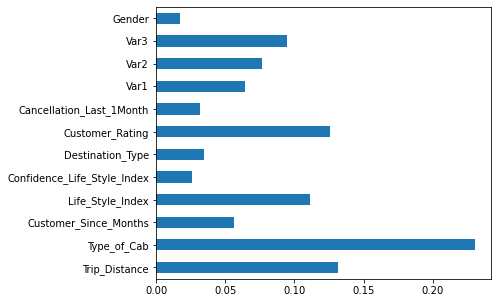

In [36]:
# Feature Importances
print(pd.DataFrame({'feature': xtrain_lenc.columns, 'importance %': rfc1.feature_importances_*100}))

pd.Series(rfc1.feature_importances_, index = xtrain_lenc.columns).plot(kind = 'barh')
plt.show()

##### One-Hot Encoded Features

In [37]:
# Fitting
rfc2 = RandomForestClassifier(random_state = 3)
rfc2.fit(xtrain_henc, ytrain)

# Evaluation
print("Accuracy:", accuracy_score(yvalid, rfc2.predict(xvalid_henc)))
# print("Classification Report\n", classification_report(yvalid, rfc2.predict(xvalid_henc)))

Accuracy: 0.7677256345973049


                          feature  importance %
0                   Trip_Distance     12.846964
1           Customer_Since_Months      5.707956
2                Life_Style_Index     10.879112
3                 Customer_Rating     12.292516
4        Cancellation_Last_1Month      3.492538
5                            Var1      6.612188
6                            Var2      7.729195
7                            Var3      9.418343
8                   Type_of_Cab_1      6.967137
9                   Type_of_Cab_2      5.817610
10                  Type_of_Cab_3      6.952697
11                  Type_of_Cab_4      2.855788
12  Confidence_Life_Style_Index_1      1.335808
13  Confidence_Life_Style_Index_2      1.077185
14             Destination_Type_1      1.369664
15             Destination_Type_2      0.648157
16             Destination_Type_3      0.620325
17             Destination_Type_4      0.361956
18             Destination_Type_5      0.283830
19             Destination_Type_6      0

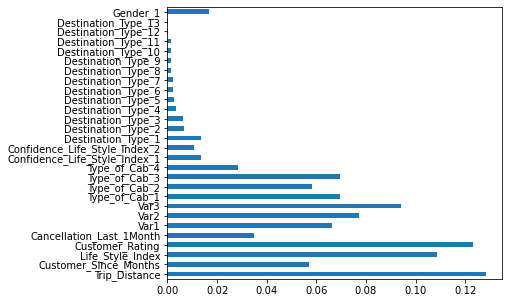

In [38]:
# Feature Importances
print(pd.DataFrame({'feature': xtrain_henc.columns, 'importance %': rfc2.feature_importances_*100}))

pd.Series(rfc2.feature_importances_, index = xtrain_henc.columns).plot(kind = 'barh')
plt.show()

### Feature Engineering

In [39]:
def new_features(data):
    data.loc[:, 'cab_dest'] = data.loc[:, 'Type_of_Cab'].astype('str') + '_' + data.loc[:, 'Destination_Type'].astype('str')
    data.loc[:, 'total_ratings'] = data.loc[:, 'Customer_Rating'] * data.loc[:, 'Customer_Since_Months']
    data.loc[:, 'tdist_per_dest'] = data.loc[:,'Trip_Distance'] / data.groupby('Destination_Type')['Trip_Distance'].transform('mean')
    data.loc[:, 'tdist_per_cab'] = data.loc[:, 'Trip_Distance'] / data.groupby('Type_of_Cab')['Trip_Distance'].transform('mean')
    data.loc[:, 'tdist_per_conf_lsi'] = data.loc[:, 'Trip_Distance'] / data.groupby('Confidence_Life_Style_Index')['Trip_Distance'].transform('mean')
    
    data.loc[:, 'cab_dest'] = data.loc[:, 'cab_dest'].astype('category')
    

In [40]:
new_features(xtrain_lenc)
new_features(xvalid_lenc)

In [41]:
print("Train:\n", xtrain_lenc.head(), "\n\n\n")
print("Valid:\n", xvalid_lenc.head())

Train:
         Trip_Distance Type_of_Cab  Customer_Since_Months  Life_Style_Index  \
23175        1.560290           4               0.774539          0.962995   
162671       0.456078           0               0.774539          0.231273   
144957      -0.553578           0               1.049282         -0.454577   
83983        0.044224           2              -0.873917         -0.502244   
119097      -0.220455           0              -1.148660         -0.484954   

       Confidence_Life_Style_Index Destination_Type  Customer_Rating  \
23175                            1                0        -0.173677   
162671                           2                0        -0.825698   
144957                           2                0         1.091862   
83983                            1                0         0.410319   
119097                           2                8        -0.407275   

        Cancellation_Last_1Month          Var1      Var2      Var3 Gender  \
23175        

### Modelling

In [43]:
from catboost import CatBoostClassifier

cbc2 = CatBoostClassifier(iterations = 3000, 
                          learning_rate = 0.05, 
                          l2_leaf_reg = 5000,
                          max_depth = 6,
                          random_strength = 3,
                         eval_metric = 'Accuracy')

cbc2.fit(xtrain_lenc, ytrain, cat_features = np.where(xtrain_lenc.dtypes == 'category')[0], plot = True,
       eval_set = (xvalid_lenc, yvalid))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6410416	test: 0.6440967	best: 0.6440967 (0)	total: 449ms	remaining: 22m 26s
1:	learn: 0.6427624	test: 0.6458007	best: 0.6458007 (1)	total: 644ms	remaining: 16m 5s
2:	learn: 0.6413186	test: 0.6442925	best: 0.6458007 (1)	total: 898ms	remaining: 14m 57s
3:	learn: 0.6414865	test: 0.6443709	best: 0.6458007 (1)	total: 1.11s	remaining: 13m 51s
4:	learn: 0.6414697	test: 0.6443513	best: 0.6458007 (1)	total: 1.27s	remaining: 12m 42s
5:	learn: 0.6415284	test: 0.6444101	best: 0.6458007 (1)	total: 1.42s	remaining: 11m 48s
6:	learn: 0.6414949	test: 0.6444101	best: 0.6458007 (1)	total: 1.59s	remaining: 11m 20s
7:	learn: 0.6415117	test: 0.6444101	best: 0.6458007 (1)	total: 1.76s	remaining: 10m 58s
8:	learn: 0.6415200	test: 0.6444101	best: 0.6458007 (1)	total: 1.91s	remaining: 10m 35s
9:	learn: 0.6415200	test: 0.6444101	best: 0.6458007 (1)	total: 2.15s	remaining: 10m 44s
10:	learn: 0.6415200	test: 0.6444101	best: 0.6458007 (1)	total: 2.31s	remaining: 10m 26s
11:	learn: 0.6415284	test: 0.644

In [45]:
print(accuracy_score(yvalid, cbc2.predict(xvalid_lenc)))
print(classification_report(yvalid, cbc2.predict(xvalid_lenc)))

0.6776089000313381
              precision    recall  f1-score   support

           1       0.71      0.67      0.69     16996
           2       0.64      0.64      0.64     17065
           3       0.69      0.72      0.70     16995

    accuracy                           0.68     51056
   macro avg       0.68      0.68      0.68     51056
weighted avg       0.68      0.68      0.68     51056



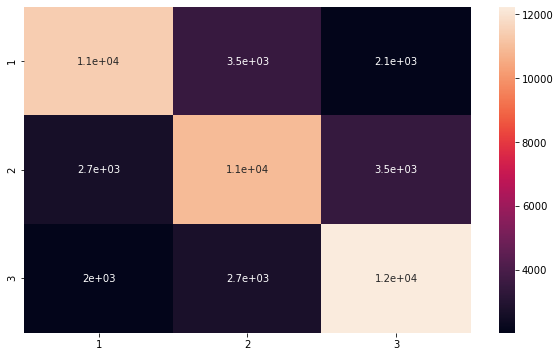

In [52]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(yvalid, cbc2.predict(xvalid_lenc)), annot = True)
plt.xticks(np.arange(0.5,3.5),labels = np.unique(y))
plt.yticks(np.arange(0.5,3.5), labels = np.unique(y))
plt.show()

### Test Data Prep

In [53]:
test = pd.read_csv("test_mob.csv")
print(test.head())

       Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0  T0005689459           9.44           A                   10.0   
1  T0005689462          32.15           B                   10.0   
2  T0005689463          10.38           C                    4.0   
3  T0005689466          14.94         NaN                    6.0   
4  T0005689468          32.03           B                    7.0   

   Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0           2.57438                           A                B   
1           2.85143                           A                A   
2           2.70530                           A                D   
3           2.48159                           C                E   
4           2.81598                           A                K   

   Customer_Rating  Cancellation_Last_1Month  Var1  Var2  Var3  Gender  
0          3.68000                         2   NaN    46    63    Male  
1          1.59375                  

In [54]:
# Impute
impute(test)

# Standardize
test.loc[:, num_cols.columns] = normalize_standardize(test.loc[:, num_cols.columns], operation = 'standardize')

# Encoding
test = encoding(test, method = 'label')

In [55]:
new_features(test)

In [56]:
print(test.head())

       Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0  T0005689459      -1.359888           0               1.131479   
1  T0005689462      -0.468735           1               1.131479   
2  T0005689463      -1.323002           2              -0.561719   
3  T0005689466      -1.144065           1               0.002680   
4  T0005689468      -0.473444           1               0.284880   

   Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0         -1.073465                           0                1   
1          0.250071                           0                0   
2         -0.448028                           0                3   
3         -1.516745                           2                4   
4          0.080718                           0               10   

   Customer_Rating  Cancellation_Last_1Month          Var1      Var2  \
0         0.848099                  1.176657 -4.817945e-16 -1.041429   
1        -1.276958                 -0.

### CBC Submission

In [58]:
# cbc = CatBoostClassifier(learning_rate = 0.05, l2_leaf_reg = 5000)

cbc2.fit(pd.concat([xtrain_lenc, xvalid_lenc]), np.concatenate((ytrain, yvalid), axis = None),
        cat_features = np.where(xtrain_lenc.dtypes == 'category')[0], plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6423224	total: 362ms	remaining: 18m 5s
1:	learn: 0.6415174	total: 653ms	remaining: 16m 18s
2:	learn: 0.6423166	total: 961ms	remaining: 15m 59s
3:	learn: 0.6423342	total: 1.23s	remaining: 15m 20s
4:	learn: 0.6423224	total: 1.46s	remaining: 14m 32s
5:	learn: 0.6422813	total: 1.63s	remaining: 13m 35s
6:	learn: 0.6423283	total: 1.93s	remaining: 13m 43s
7:	learn: 0.6423577	total: 2.18s	remaining: 13m 34s
8:	learn: 0.6423401	total: 2.38s	remaining: 13m 9s
9:	learn: 0.6423224	total: 2.64s	remaining: 13m 9s
10:	learn: 0.6423342	total: 2.9s	remaining: 13m 8s
11:	learn: 0.6423459	total: 3.21s	remaining: 13m 20s
12:	learn: 0.6423342	total: 3.46s	remaining: 13m 16s
13:	learn: 0.6423224	total: 3.73s	remaining: 13m 14s
14:	learn: 0.6423166	total: 3.96s	remaining: 13m 7s
15:	learn: 0.6423342	total: 4.19s	remaining: 13m 2s
16:	learn: 0.6423518	total: 4.42s	remaining: 12m 54s
17:	learn: 0.6423518	total: 4.66s	remaining: 12m 52s
18:	learn: 0.6423342	total: 4.96s	remaining: 12m 58s
19:	learn:

In [60]:
sub2 = pd.DataFrame({'Trip_ID' : test['Trip_ID'], 'Surge_Pricing_Type':np.concatenate(cbc2.predict(test.iloc[:, 1:]))})

print(sub2.head())

       Trip_ID  Surge_Pricing_Type
0  T0005689459                   1
1  T0005689462                   2
2  T0005689463                   2
3  T0005689466                   2
4  T0005689468                   2


In [61]:
# sub2.to_csv("cbc.csv", index = False)